## Open the winequality-red.csv. Prepare the file for use in a Jupyter notebook and save as, then in a JupyterNotebook, examine and visualize the data, using appropriate plots, metrics to gain an understanding of the four attributes. 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import*


# Set the display width of the cell to the full width of the page
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# Set the display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('expand_frame_repr', True)

In [2]:
%matplotlib inline
## Reading in all the columns of data
fileName = r'C:\Users\smaxw\Downloads\winequality-red-no-headers.csv'
namesCol = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol',
    'quality'
]

colsOfInterest = [
    'residual sugar',
    'density',
    'pH',
    'alcohol'
]

#Printing the first 20 columns of data to check out the data
data = pd.read_csv(fileName, names=namesCol)
print(data.head(20))

    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  alcohol  quality
0             7.4             0.700         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56      9.4        5
1             7.8             0.880         0.00             2.6      0.098                 25.0                  67.0   0.9968  3.20       0.68      9.8        5
2             7.8             0.760         0.04             2.3      0.092                 15.0                  54.0   0.9970  3.26       0.65      9.8        5
3            11.2             0.280         0.56             1.9      0.075                 17.0                  60.0   0.9980  3.16       0.58      9.8        6
4             7.4             0.700         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56      9.4        5
5             7.4     

In [3]:
## Getting a feel for the data
print(data.describe())
print()
print(data.dtypes)

       fixed acidity  volatile acidity  citric acid  residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide      density           pH    sulphates      alcohol      quality
count    1599.000000       1599.000000  1599.000000     1599.000000  1599.000000          1599.000000           1599.000000  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000
mean        8.319637          0.527821     0.270976        2.569468     0.087467            15.874922             46.467792     0.997505     3.274790     0.658149    10.497342     5.636023
std         1.741096          0.179060     0.194801        1.578366     0.047065            10.460157             32.895324     0.015270     0.705818     0.169507     1.821487     0.807569
min         4.600000          0.120000     0.000000        0.900000     0.012000             1.000000              6.000000     0.990070    -1.000000     0.330000     8.400000     3.000000
25%         7.100000          0.390000     0.090000    

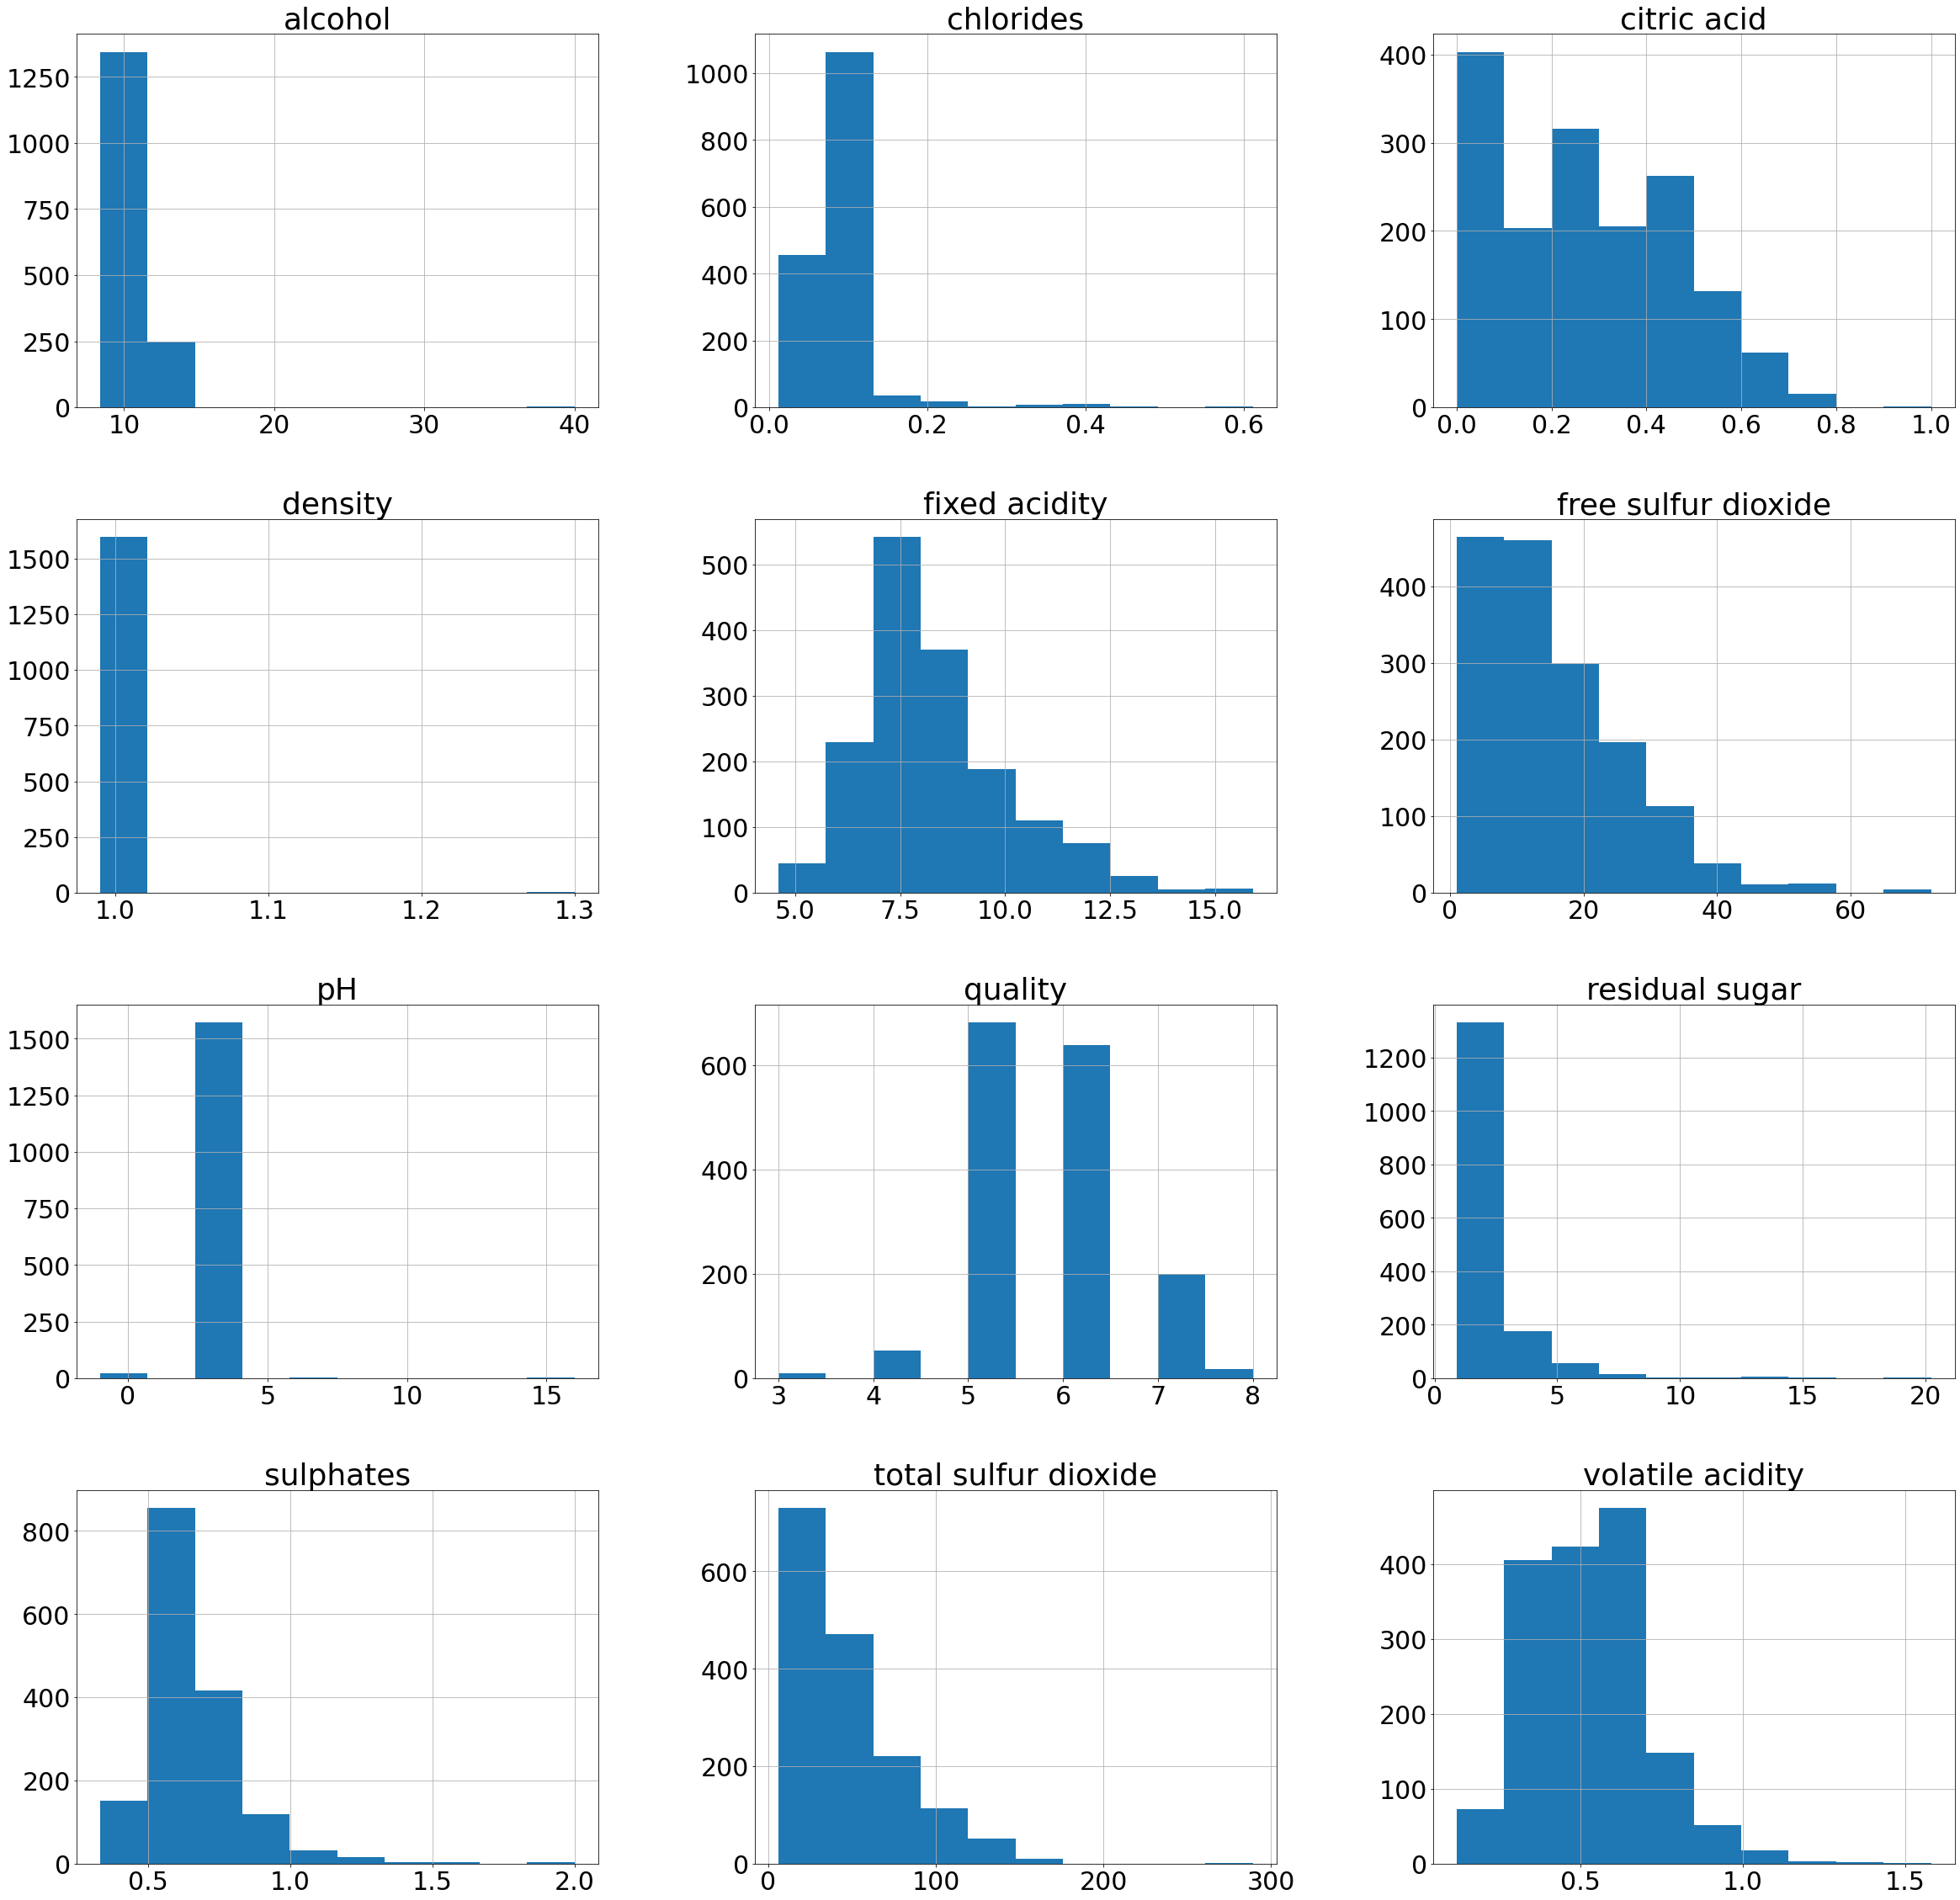

In [4]:
## Reading in the datafile
data = pd.read_csv(fileName, names=namesCol)
# Font Size
plt.rc('font', size =30)
# Histogram Size
data.hist(figsize=(40,40))
# Savefigure if needed
plt.savefig("winequality.jpg")
plt.show()

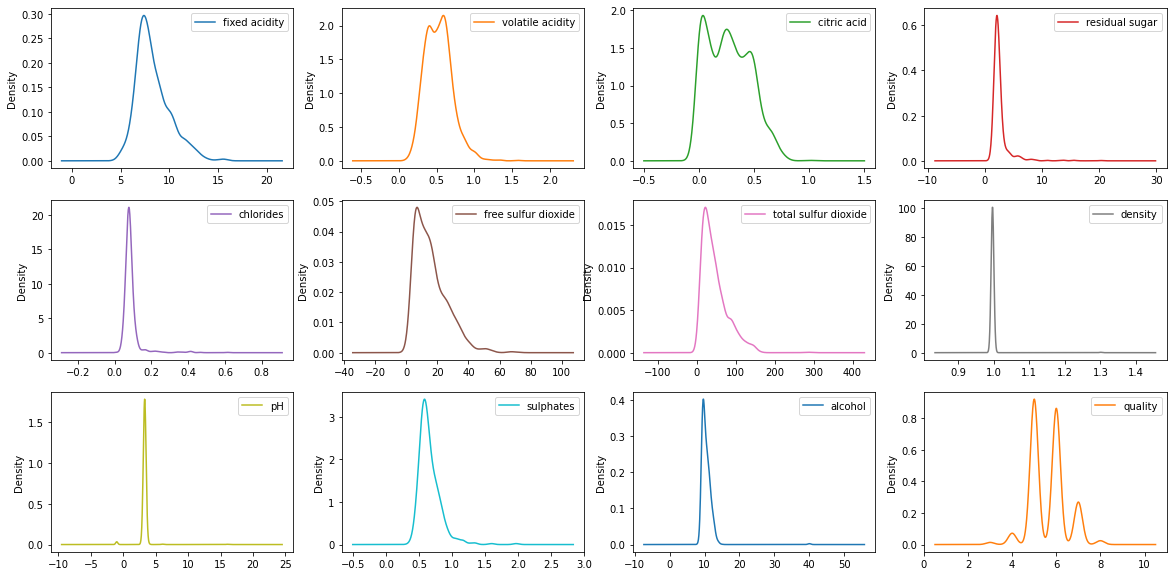

In [5]:
## Showing the data correlation
# Font Size
plt.rc('font', size =10)
# Histogram Size
data.plot(kind='density', subplots=True, layout=(3,4), sharex=False, figsize=(20,10))
plt.show()

Correlation Matrix


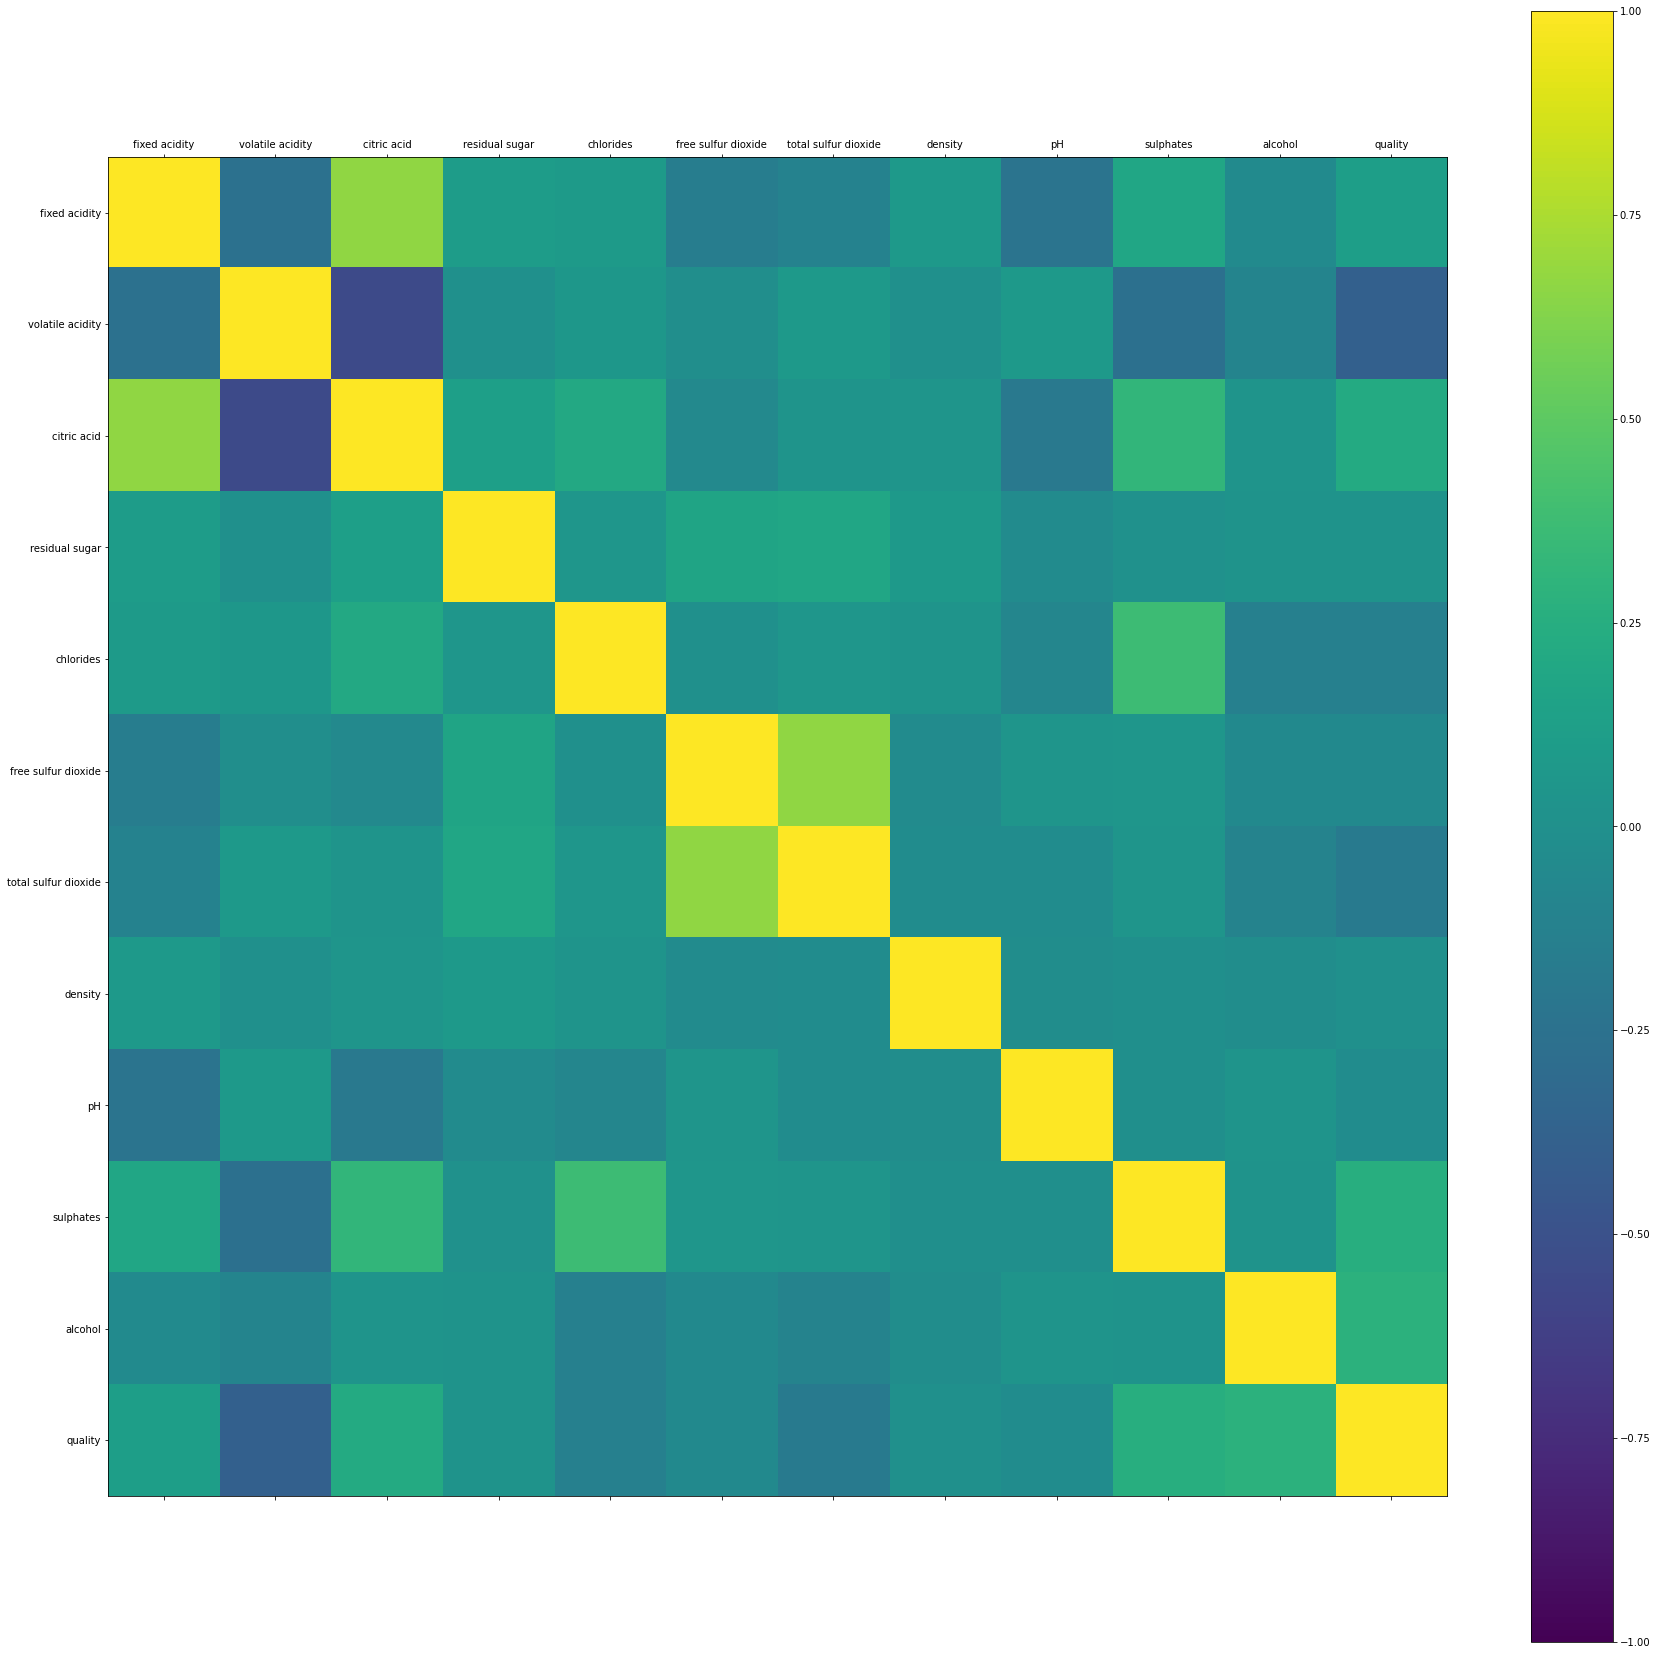

Correlation Table


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.07,-0.23,0.18,-0.04,0.12
volatile acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.01,0.08,-0.26,-0.10,-0.39
citric acid,0.67,-0.55,1.00,0.13,0.20,-0.06,0.04,0.04,-0.19,0.31,0.04,0.23
residual sugar,0.11,0.00,0.13,1.00,0.05,0.17,0.18,0.08,-0.04,0.01,0.03,0.03
chlorides,0.09,0.06,0.20,0.05,1.00,0.01,0.05,0.04,-0.08,0.37,-0.13,-0.13
free sulfur dioxide,-0.15,-0.01,-0.06,0.17,0.01,1.00,0.67,-0.04,0.05,0.05,-0.05,-0.05
total sulfur dioxide,-0.11,0.08,0.04,0.18,0.05,0.67,1.00,-0.03,-0.02,0.04,-0.11,-0.19
density,0.07,0.01,0.04,0.08,0.04,-0.04,-0.03,1.00,-0.02,-0.00,-0.02,0.00
pH,-0.23,0.08,-0.19,-0.04,-0.08,0.05,-0.02,-0.02,1.00,-0.01,0.04,-0.03
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,-0.00,-0.01,1.00,0.02,0.25


In [6]:
correlations = data.corr()
print("Correlation Matrix")
# plot correlation matrix
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,12,1) # Must equel the number of columns to display

## Sets the 
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(namesCol)
ax.set_yticklabels(namesCol)
plt.show()
print("Correlation Table")
# Correlation Table, note this does not export easily
corr = data.corr()
corr.style.background_gradient().set_precision(2)

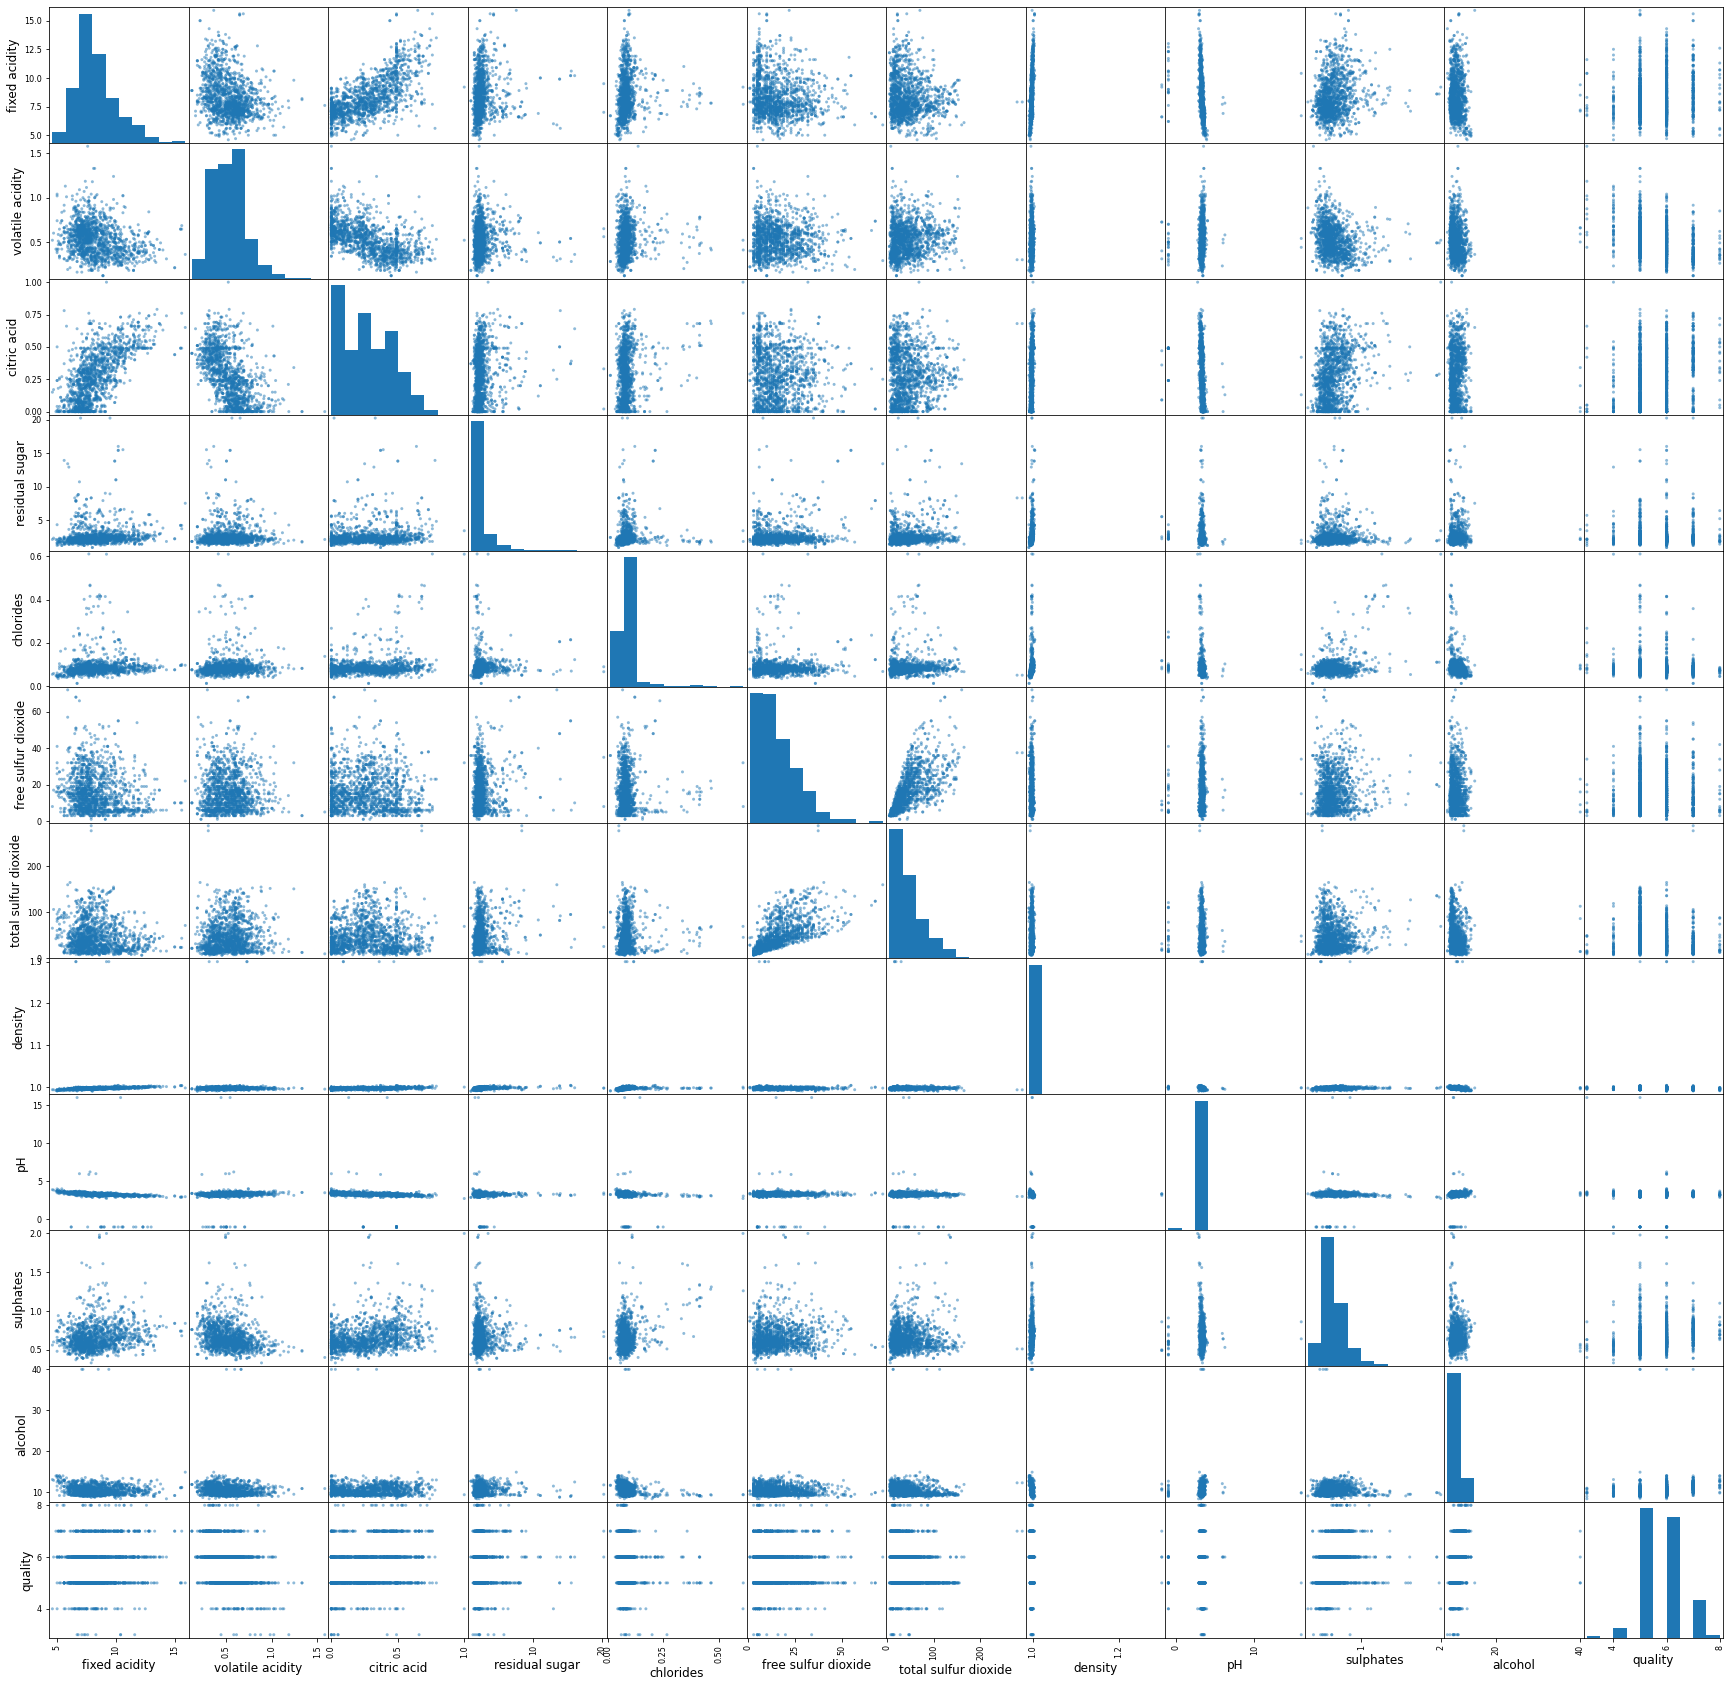

In [7]:
data = pd.read_csv(fileName, names=namesCol)
plt.rc('font', size =12)
pd.plotting.scatter_matrix(data, figsize=(30,30))
plt.show()

In [8]:
classcounts = data.groupby('quality').size()
print(classcounts)

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


## Q2. For the four attributes (Residual Sugar,Density,pH,Alcohol), identify and discuss (giving reason based on graphical and statistical data from Q1 or additional) any missing data or outliers (if any) for each of the four attributes. Document what you plan to do with the missing values. See appendix 1 for additional information.

### I see from residual sugar there are some outliers. The wine percentages for some alcohols is far outside the typical range (15%) and some values up to 20%. which is excessive for an alcohol
### For Density there are outliers which shows up as 1.3 on my bar chart. All wine values should be no more than 1.01.

### Outliers are at 0% and some at 15% and an outlier at around 6 or 7% for the pH. Having checked the max and min for the pH column I can confirm that there are outliers that show as -1, I ignore this in the bar charts. The mean of 3.27 also aligns with where the majority of values are visually in the bar chart

### Looking at the alcohol bar chart and line graph it is clear that there are outliers around 35-40%. The majority are within 8-15% range. I confirmed this looker at the scatter matrix.

### I have checked the data of the four attributes for NaN’s which includes spaces, question marks etc and concluded there is no missing data. Because all the stats ran all the number values are numerical. 

### I plan to impute the outliers in all 4 attributes to their mean in order to avoid biasing any of the data. 

Attribue: RESIDUAL SUGAR
Summary:
N outside of two STD:	 62 	( 3.88 %)
N outside of three STD:	 30 	( 1.88 %)


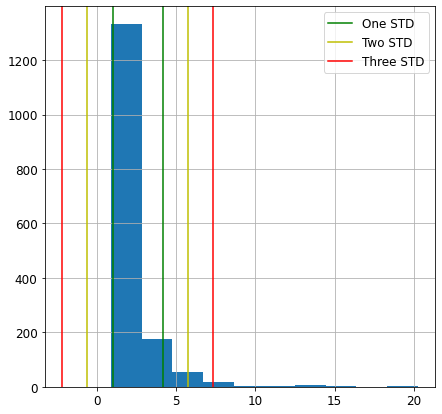

Attribue: DENSITY
Summary:
N outside of two STD:	 4 	( 0.25 %)
N outside of three STD:	 4 	( 0.25 %)


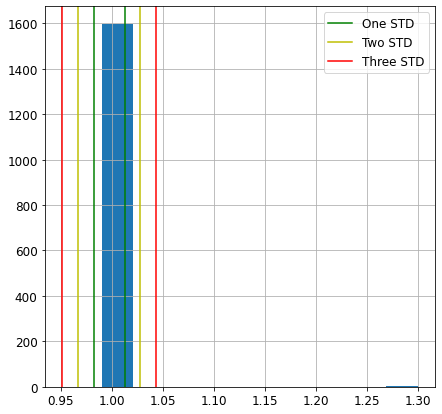

Attribue: PH
Summary:
N outside of two STD:	 28 	( 1.75 %)
N outside of three STD:	 28 	( 1.75 %)


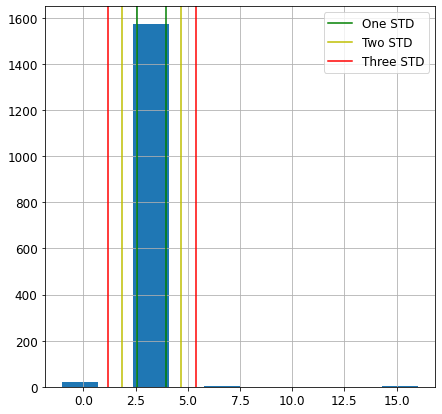

Attribue: ALCOHOL
Summary:
N outside of two STD:	 5 	( 0.31 %)
N outside of three STD:	 4 	( 0.25 %)


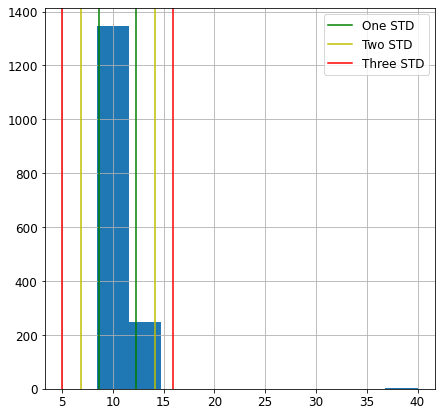

In [9]:
def plotAttribute(featureName):
    oneSTD = data[featureName].std()
    twoSTD = oneSTD * 2
    threeSTD = oneSTD * 3
    meanValue = data[featureName].mean()
    print("Attribue:", featureName.upper())
    print("Summary:")
    instances = data.shape[0]
    outsideTwo = ((data[featureName] < (meanValue - twoSTD)).sum() +
    (data[featureName] > (meanValue + twoSTD)).sum())
    outsideThree = ((data[featureName] < (meanValue - threeSTD)).sum() +
    (data[featureName] > (meanValue + threeSTD)).sum())
    print("N outside of two STD:\t", outsideTwo, "\t(", round((outsideTwo/
    instances) *100, 2),"%)")
    print("N outside of three STD:\t", outsideThree, "\t(", round((outsideThree/
    instances) * 100, 2),"%)")
    plt.axvline(x=(meanValue - oneSTD), label='One STD', c="g")
    plt.axvline(x=(meanValue + oneSTD), c="g")

    plt.axvline(x=(meanValue - twoSTD), label='Two STD', c="y")
    plt.axvline(x=(meanValue + twoSTD), c="y")
    plt.axvline(x=(meanValue - threeSTD), label='Three STD', c="r")
    plt.axvline(x=(meanValue + threeSTD), c="r")
    data[featureName].hist(figsize=(7,7))
    plt.legend()
    plt.show()
for attribute in colsOfInterest:
    plotAttribute(attribute)

### Q3.Mark and clean the data your choices must be based on your documented answer to question 2. Create a CSV file of this clean data called: winequality-red_Q3.csv.

In [13]:
##counting the number of NaN's in the residual sugar column
data[["residual sugar"]] = data[["residual sugar"]].mask(data[["residual sugar"]]>= 10, np.NaN)
print("\nNaN Using > 10 residual sugar: ", float(data[["residual sugar"]].isnull().sum()))

data[["density"]] = data[["density"]].mask(data[["density"]] >= 1.01, np.NaN)
# count the number of NaN values in each column
print("\nNaN Using > 1.01 density: ", float(data[["density"]].isnull().sum()))

# pH
data[["pH"]] = data[["pH"]].mask(data[["pH"]] < 0, np.NaN)
data[["pH"]] = data[["pH"]].mask(data[["pH"]] > 4.5, np.NaN)
# count the number of NaN values in each column
print("\nNaN Using < 0 and > 4.5 pH: ", float(data[["pH"]].isnull().sum()))

# Alochol
data[["alcohol"]] = data[["alcohol"]].mask(data[["alcohol"]] >= 15, np.NaN)
# count the number of NaN values in each column
print("\nNaN Using > 15 alcohol: ", float(data[["alcohol"]].isnull().sum()))


NaN Using > 10 residual sugar:  14.0

NaN Using > 1.01 density:  4.0

NaN Using < 0 and > 4.5 pH:  28.0

NaN Using > 15 alcohol:  4.0


In [15]:
##Ensuring that the columnswere removed.
# print shape first
print(data.shape)
# drop rows with missing values
data.dropna(inplace=True)
# summarize the number of rows and columns in the dataset
print(data.shape)
# note 50 should be removed

(1599, 12)
(1549, 12)


In [14]:
data.to_csv("wineQualClean.csv",header=False)

## Visualize the data again with the four attributes cleaned, identify one set of attributes that are most multicollinear within the four attributes. Then include one set of attributes that are very multicollinear that should be addressed (as there is an expected relationship) using all attributes?

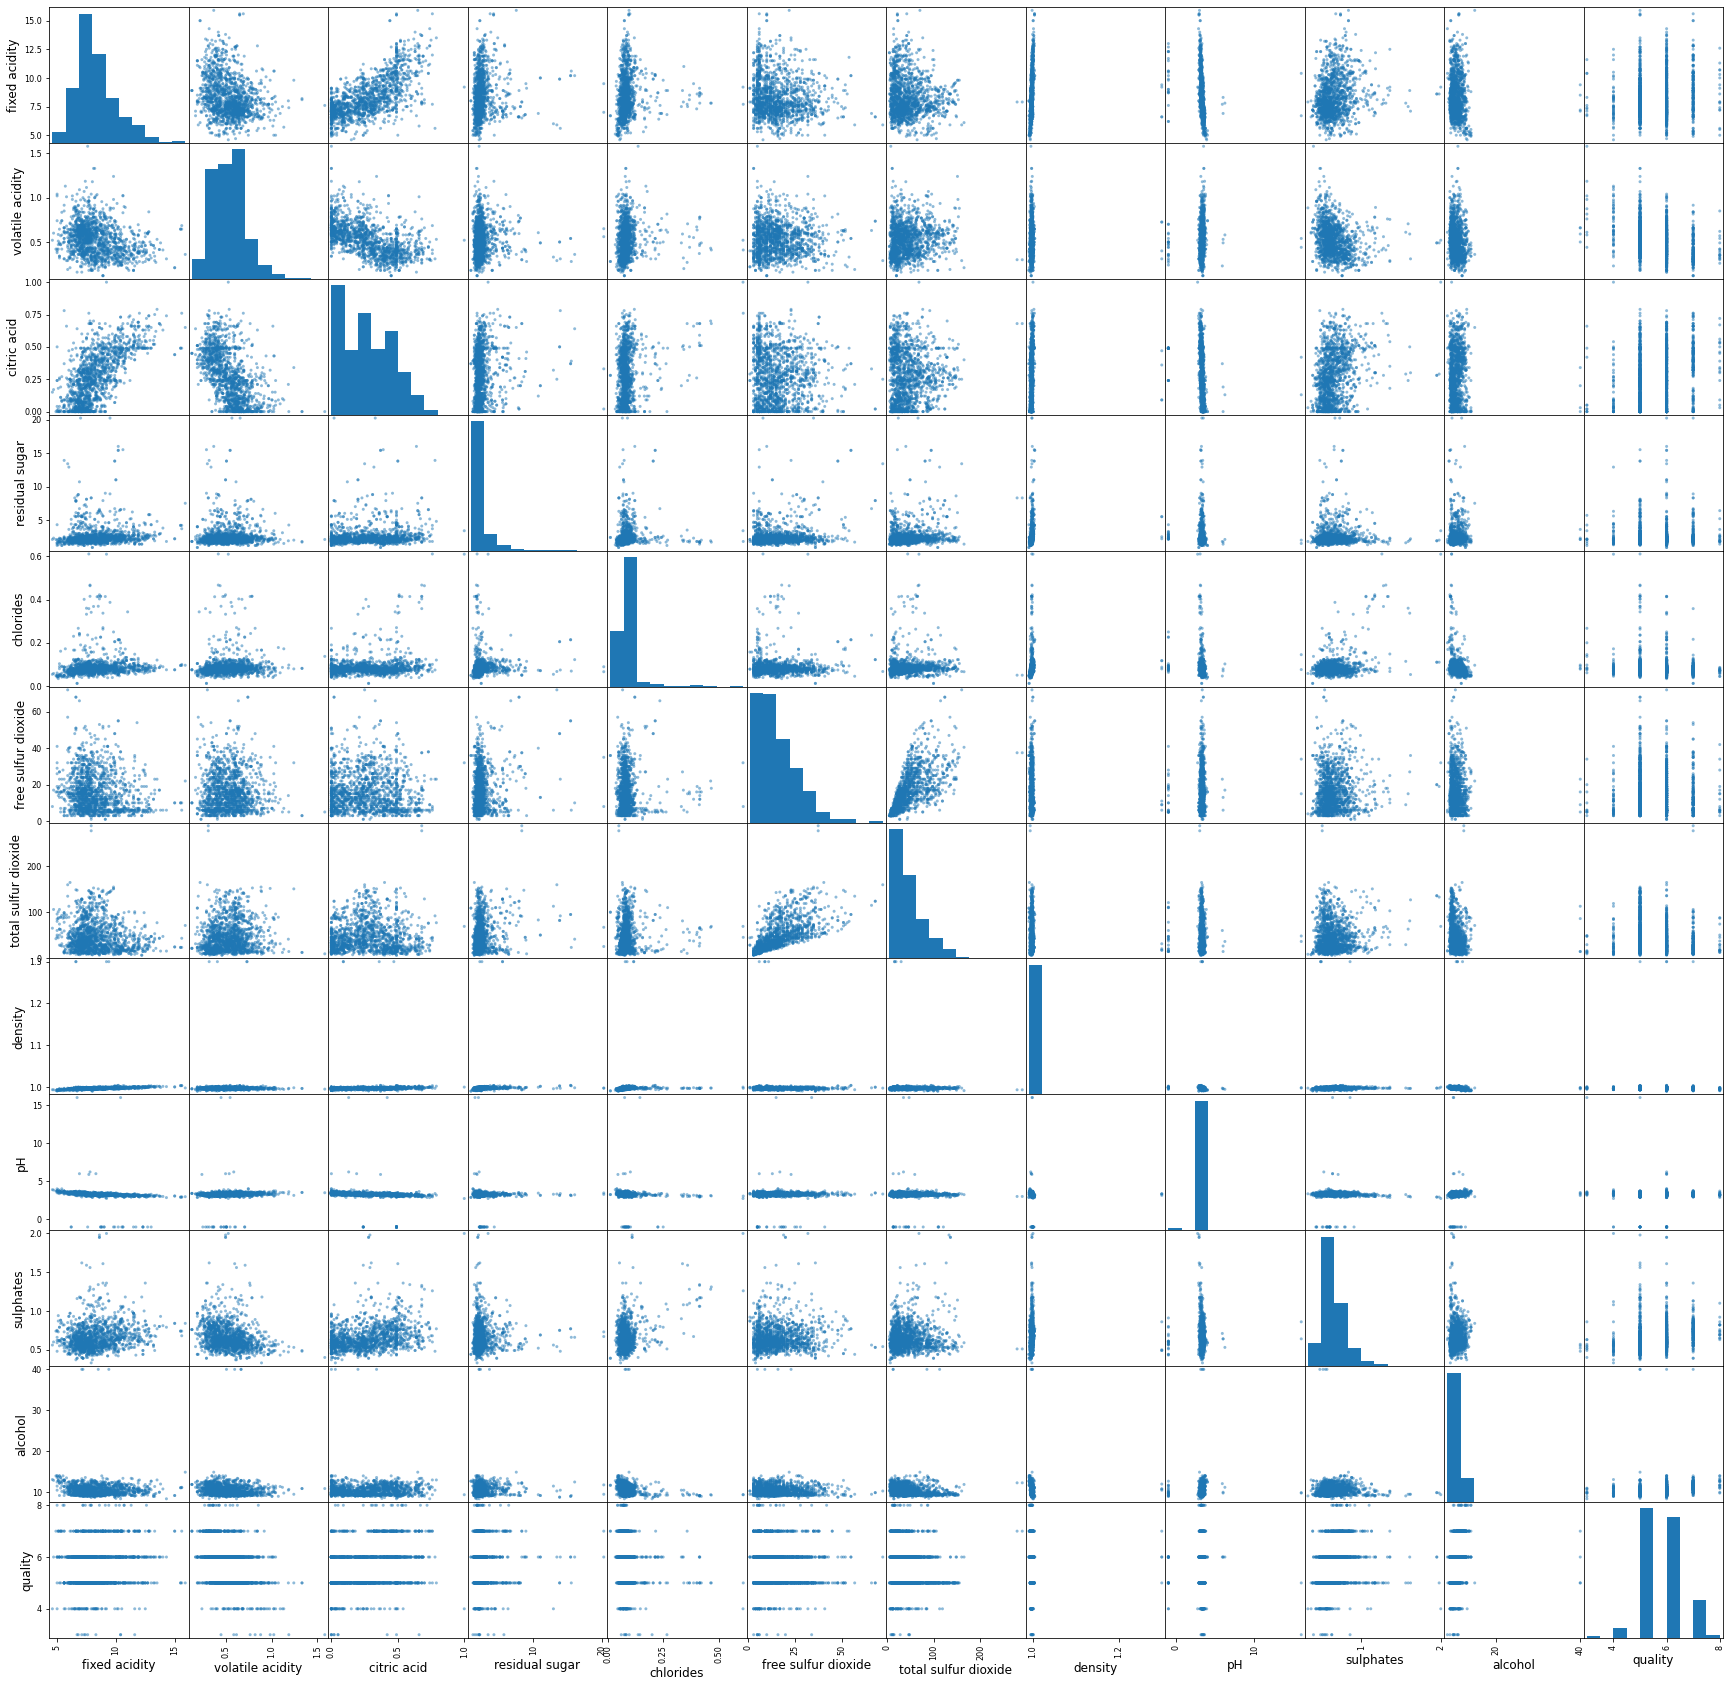

In [16]:
data = pd.read_csv(fileName, names=namesCol)
plt.rc('font', size =12)
pd.plotting.scatter_matrix(data, figsize=(30,30))
plt.show()

In [17]:
# Correlation
corr = data.corr()
corr.style.background_gradient().set_precision(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.07,-0.23,0.18,-0.04,0.12
volatile acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.01,0.08,-0.26,-0.10,-0.39
citric acid,0.67,-0.55,1.00,0.13,0.20,-0.06,0.04,0.04,-0.19,0.31,0.04,0.23
residual sugar,0.11,0.00,0.13,1.00,0.05,0.17,0.18,0.08,-0.04,0.01,0.03,0.03
chlorides,0.09,0.06,0.20,0.05,1.00,0.01,0.05,0.04,-0.08,0.37,-0.13,-0.13
free sulfur dioxide,-0.15,-0.01,-0.06,0.17,0.01,1.00,0.67,-0.04,0.05,0.05,-0.05,-0.05
total sulfur dioxide,-0.11,0.08,0.04,0.18,0.05,0.67,1.00,-0.03,-0.02,0.04,-0.11,-0.19
density,0.07,0.01,0.04,0.08,0.04,-0.04,-0.03,1.00,-0.02,-0.00,-0.02,0.00
pH,-0.23,0.08,-0.19,-0.04,-0.08,0.05,-0.02,-0.02,1.00,-0.01,0.04,-0.03
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,-0.00,-0.01,1.00,0.02,0.25


## Normalize your data, as it may be used in specific machine learning algorithms, Create a CSV file of this normalized clean data called: winequality-red_Q5.csv

In [32]:
 # Convert to array
array = data.values
# get seperated input and classifies, using a deep copy of a list
X = array[:,0:11]
Y = array[:,11]

scaler = preprocessing.Normalizer().fit(X)
normalizedX = scaler.transform(X)
#Convert back to Pandas
normX = pd.DataFrame(normalizedX)
Y = pd.DataFrame(Y)
# Concatinating the dataframes back together
outData = pd.concat([normX, Y], axis=1, sort=False)
# Saving the data
outData.to_csv("winequality-red_Q5.csv",header=False, index=False)

## Use any two techniques to select the top three attributes for a prediction model. Document the top three attributes for each technique and finally determine the best attributes if they appear in both techniques.

In [30]:
##RFE
array = data.values
# get seperated input and classifies, using a deep copy of a list
X = array[:,0:11]
Y = array[:,11]

model = linear_model.LogisticRegression()
rfe = feature_selection.RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("\n{0:<20}".format("Attribute"), "{0:<20}".format("Select?"), "{0:<20}".format("Rank"))
print("-----------------------------------------------------------------------------------")

for index, result in enumerate(list(fit.ranking_)):
    print("{0:<20}".format(namesCol[index]), "{0:<20}".format(fit.support_[index]), "{0:<20}".format(result))

C:\Dev\Anaconda\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Dev\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Dev\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or sca

Num Features: 3

Attribute            Select?              Rank                
-----------------------------------------------------------------------------------
fixed acidity        0                    6                   
volatile acidity     1                    1                   
citric acid          0                    2                   
residual sugar       0                    7                   
chlorides            1                    1                   
free sulfur dioxide  0                    8                   
total sulfur dioxide 0                    9                   
density              0                    3                   
pH                   0                    5                   
sulphates            1                    1                   
alcohol              0                    4                   


In [31]:
test = feature_selection.SelectKBest(score_func=feature_selection.f_regression,k=4)
fit = test.fit(X, Y)
print()
# have to manually display as no function to do so available
for index, result in enumerate(fit.scores_):
    print("{0:20}".format(namesCol[index]),"{0:20}".format(round(result,2)))


fixed acidity                       24.96
volatile acidity                   287.44
citric acid                         86.26
residual sugar                       1.42
chlorides                           26.99
free sulfur dioxide                  4.11
total sulfur dioxide                56.66
density                               0.0
pH                                    1.5
sulphates                          107.74
alcohol                            139.17
